## Abstract:
- The "Flite Price Prediction" project aims to develop a machine learning model to predict the prices of flight tickets accurately. With the increasing demand for air travel and the dynamic nature of ticket pricing, there is a need for a reliable model that can assist travelers in making informed decisions regarding their flight bookings. By leveraging historical flight data, including factors such as departure/arrival locations, dates, airlines, and additional features, the project seeks to build a predictive model that can estimate future flight prices with a high degree of accuracy.



# Problem Statement:
- The airline industry operates in a highly competitive and dynamic environment where ticket prices fluctuate frequently based on various factors such as demand, seasonality, fuel prices, and competition. This unpredictability often makes it challenging for travelers to plan and budget their trips effectively. Therefore, the primary objective of this project is to develop a robust machine learning model that can accurately predict flight prices, thereby empowering travelers to make informed decisions and potentially save money on their air travel expenses.

# Libaries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_excel('Data_Train.xlsx')
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Observation:
- We can see that data type of 'Date_of_Journey' column is display as object even the column contain date and time values.This is because the 'Date_of_Journey' column values is in string format,so we are going to convert 'Date_of_Journey' column values in date and time format.

# Goal:
- From 'Date_of_Journey' column I have to create three more column which will specify my day , month and year using feature engineering.

# Feature Engineering on Date_of_Journey:

In [5]:
df_train['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10683, dtype: object

## 1. Tecnique_1. Spliting Date,Month and Year(Date_of_Journey) into individual column:

In [6]:
df_train['Date']=df_train['Date_of_Journey'].str.split('/').str[0]
df_train['Month']=df_train['Date_of_Journey'].str.split('/').str[1]
df_train['Year']=df_train['Date_of_Journey'].str.split('/').str[2]

In [7]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


## 2.Tecnique_2. Spliting Date,Month and Year(Date_of_Journey) into individual column:

In [8]:
df_train['Date']=df_train['Date_of_Journey'].apply(lambda x:x.split('/')[0])
df_train['Month']=df_train['Date_of_Journey'].apply(lambda x:x.split('/')[1])
df_train['Year']=df_train['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [9]:
df_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019


## 3.Converting date,month and year(Date_of_Journey) column into integer:

In [10]:
df_train['Date']=df_train['Date'].astype(int)
df_train['Month']=df_train['Month'].astype(int)
df_train['Year']=df_train['Year'].astype(int)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


## 4.Droping Date_of_Journey column:

In [12]:
df_train.drop('Date_of_Journey',axis=1,inplace=True)

In [13]:
df_train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


# Goal:
- In the arrival_time column the values are in '04:25 10 Jun' this order but I want the value in only time format which basically should have to be in '04:25' this order . So I am going to do feature engineering to convert the arrival_time column values from this order '04:25 10 Jun' to this order '04:25'.

# Feature Engineering on Arrival_Time:

In [14]:
df_train['Arrival_Time']=df_train['Arrival_Time'].apply(lambda x  : x.split(' ')[0])

In [15]:
df_train.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019


## 1.Spliting Hour and Minute(Arrival_Time) into individual column :

In [16]:
df_train['Arrival_Hour']=df_train['Arrival_Time'].apply(lambda x  : x.split(':')[0])
df_train['Arrival_Min']=df_train['Arrival_Time'].apply(lambda x  : x.split(':')[1])

In [17]:
df_train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


## 2.Droping 'Arrival_Time' column:

In [18]:
df_train.drop('Arrival_Time',axis=1,inplace=True)

In [19]:
df_train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


## 3.Converting 'Arrival_Hour' and 'Arrival_Min' into integer:

In [20]:
df_train['Arrival_Min']=df_train['Arrival_Min'].astype(int)
df_train['Arrival_Hour']=df_train['Arrival_Hour'].astype(int)

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_Hour     10683 non-null  int64 
 13  Arrival_Min      10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


# Feature Engineering on Dep_Time:

## 1.Spliting Hour and Minute(Dep_Time) into individual column :

In [22]:
df_train['Dep_Hour']=df_train['Dep_Time'].apply(lambda x  : x.split(':')[0])
df_train['Dep_Min']=df_train['Dep_Time'].apply(lambda x  : x.split(':')[1])

In [23]:
df_train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50


#  2.Droping 'Dep_Time' column:

In [24]:
df_train.drop('Dep_Time',axis=1,inplace=True)

In [25]:
df_train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50


## 3.Converting 'Dep_Hour' and 'Dep_Min' into integer:

In [26]:
df_train['Dep_Hour']=df_train['Dep_Hour'].astype(int)
df_train['Dep_Min']=df_train['Dep_Min'].astype(int)

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Arrival_Hour     10683 non-null  int64 
 12  Arrival_Min      10683 non-null  int64 
 13  Dep_Hour         10683 non-null  int64 
 14  Dep_Min          10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


# Maping of Total_Stops column:

In [28]:
df_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [29]:
df_train['Total_Stops']=df_train['Total_Stops'].map({'non-stop':0,'2 stops':2, '1 stop':1, '3 stops':3, 'nan':5
                                                     , '4 stops':4})

In [30]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50


# Droping Route column:

In [31]:
df_train.drop('Route',axis=1,inplace=True)

In [32]:
df_train.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,4,25,9,25


# Feature Engineering on 'Duration' column:

## 1. Spliting Hour and Minute (Duration) into individual column:

In [33]:
df_train['Duration'].str.split(' ').str[0].str.replace("h","")

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10683, dtype: object

# 2.Spliting Hour:

In [34]:
df_train['Duration_Hour']=df_train['Duration'].str.split(' ').str[0].str.replace("h", "")

In [35]:
df_train.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,4,25,9,25,19


In [36]:
df_train[df_train['Duration_Hour']=='5m']
## Since this two column below has no clearly define duration data/feature so we are going to drop it.

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327,6,3,2019,16,55,16,50,5m


# 3.Droping (6474,2660) data from Duration Column:

In [37]:
df_train.drop(6474,axis=0,inplace=True)

In [38]:
df_train.drop(2660,axis=0,inplace=True)

In [39]:
df_train[df_train['Duration_Hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour


# 4.Spliting Minute:

In [40]:
df_train['Duration_min']= df_train['Duration'].str.split('h').str[1].str.replace("m" , "")


In [41]:
df_train.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,4,25,9,25,19,


In [42]:
df_train['Duration_min'].unique()

array([' 50', ' 25', '', ' 45', ' 30', ' 5', ' 15', ' 35', ' 10', ' 20',
       ' 55', ' 40'], dtype=object)

In [43]:
df_train[df_train['Duration_min']=='']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_min
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,4,25,9,25,19,
18,Air India,Delhi,Cochin,23h,2.0,No info,13381,12,6,2019,19,15,20,15,23,
33,Jet Airways,Delhi,Cochin,22h,2.0,In-flight meal not included,10919,15,6,2019,12,35,14,35,22,
44,Multiple carriers,Delhi,Cochin,12h,1.0,No info,13062,21,3,2019,21,0,9,0,12,
53,IndiGo,Banglore,Delhi,3h,0.0,No info,3943,18,6,2019,0,15,21,15,3,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10591,Jet Airways,Delhi,Cochin,23h,2.0,No info,14300,12,6,2019,19,0,20,0,23,
10638,Jet Airways,Banglore,New Delhi,14h,1.0,In-flight meal not included,7832,21,3,2019,11,25,21,25,14,
10639,Air India,Delhi,Cochin,38h,3.0,No info,10493,3,6,2019,19,15,5,15,38,
10673,Jet Airways,Delhi,Cochin,15h,2.0,No info,16704,27,5,2019,4,25,13,25,15,


# Observation:
- In 'Duration_min' column 1000 of values are missing which cause difficulty while converting it into integer so we are going to replace ('') this missing value with zero.

In [44]:
df_train['Duration_min']=df_train['Duration_min'].replace('',0)

In [45]:
df_train[df_train['Duration_min']=='']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_min


# 5.Droping Duration Column:

In [46]:
df_train.drop('Duration',axis=1,inplace=True)

In [47]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,3,2019,21,35,16,50,4,45


# 6.Converting 'Duration_hour' and 'Duration_min' into integer:

In [48]:
df_train['Duration_Hour']=df_train['Duration_Hour'].astype(int)

In [49]:
df_train['Duration_min']=df_train['Duration_min'].astype(int)

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10681 non-null  object 
 1   Source           10681 non-null  object 
 2   Destination      10681 non-null  object 
 3   Total_Stops      10680 non-null  float64
 4   Additional_Info  10681 non-null  object 
 5   Price            10681 non-null  int64  
 6   Date             10681 non-null  int64  
 7   Month            10681 non-null  int64  
 8   Year             10681 non-null  int64  
 9   Arrival_Hour     10681 non-null  int64  
 10  Arrival_Min      10681 non-null  int64  
 11  Dep_Hour         10681 non-null  int64  
 12  Dep_Min          10681 non-null  int64  
 13  Duration_Hour    10681 non-null  int64  
 14  Duration_min     10681 non-null  int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 1.3+ MB


# Pie Chart of Top 5 Flight:

In [51]:
flight_names=df_train['Airline'].value_counts().index

In [52]:
flight_names

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object', name='Airline')

In [53]:
Total_flight=df_train['Airline'].value_counts().values

In [54]:
Total_flight

array([3848, 2053, 1751, 1196,  818,  479,  319,  194,   13,    6,    3,
          1])

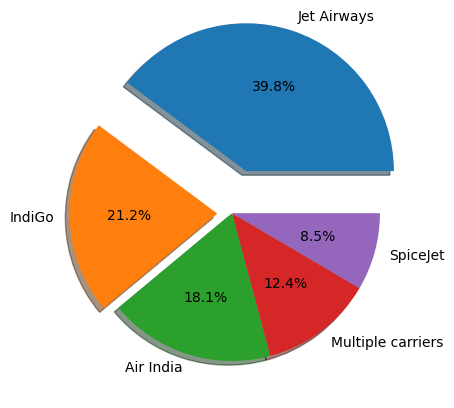

In [55]:
plt.pie(Total_flight[:5],labels=flight_names[:5],autopct='%1.1f%%',shadow=True,explode=(0.3,0.1,0,0,0));

# Observation:
- In this dataset maximum number of flight was from 'Jet Airways' which is 39.3% of total number of flight that have completed their destination in the year 2019 by flying different state of India.

# Droping Null Values:

In [56]:
df_train.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_Hour       0
Arrival_Min        0
Dep_Hour           0
Dep_Min            0
Duration_Hour      0
Duration_min       0
dtype: int64

In [57]:
df_train.dropna(inplace=True)

In [58]:
df_train.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_Hour       0
Arrival_Min        0
Dep_Hour           0
Dep_Min            0
Duration_Hour      0
Duration_min       0
dtype: int64

# Plotting Catplot (Airline Vs Price):

In [59]:
df_train['Airline'].value_counts()

Airline
Jet Airways                          3848
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

/Users/pratikchetry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


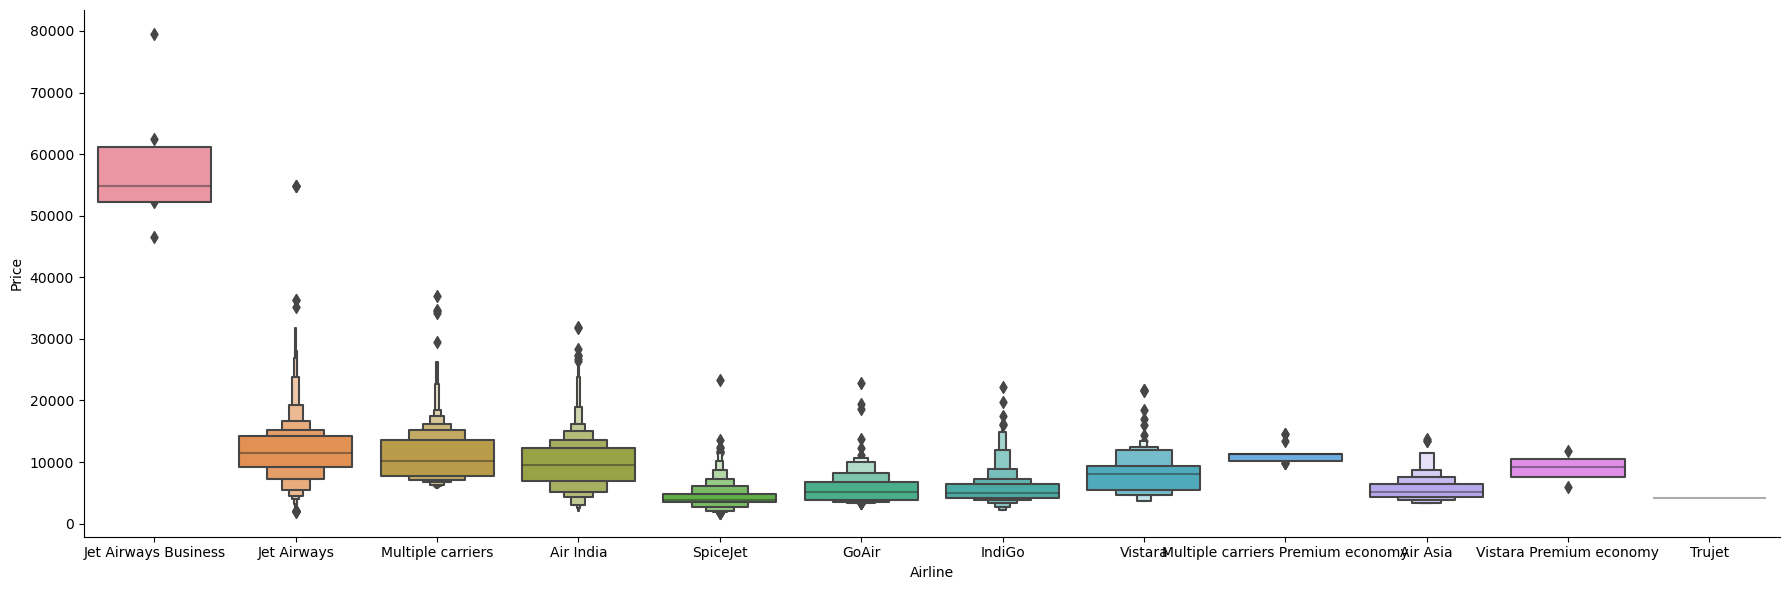

In [60]:
sns.catplot(x='Airline',y='Price',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

# Label Encoding:

## 1.One Hot Encoding:
- As Airline is Nominal Categorical Data we will do One Hot Encoding : 

In [61]:
Airline = df_train[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True).astype(int)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


# Plotting Catplot (Source Vs Price):

In [62]:
df_train['Source'].value_counts()

Source
Delhi       4535
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: count, dtype: int64

/Users/pratikchetry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


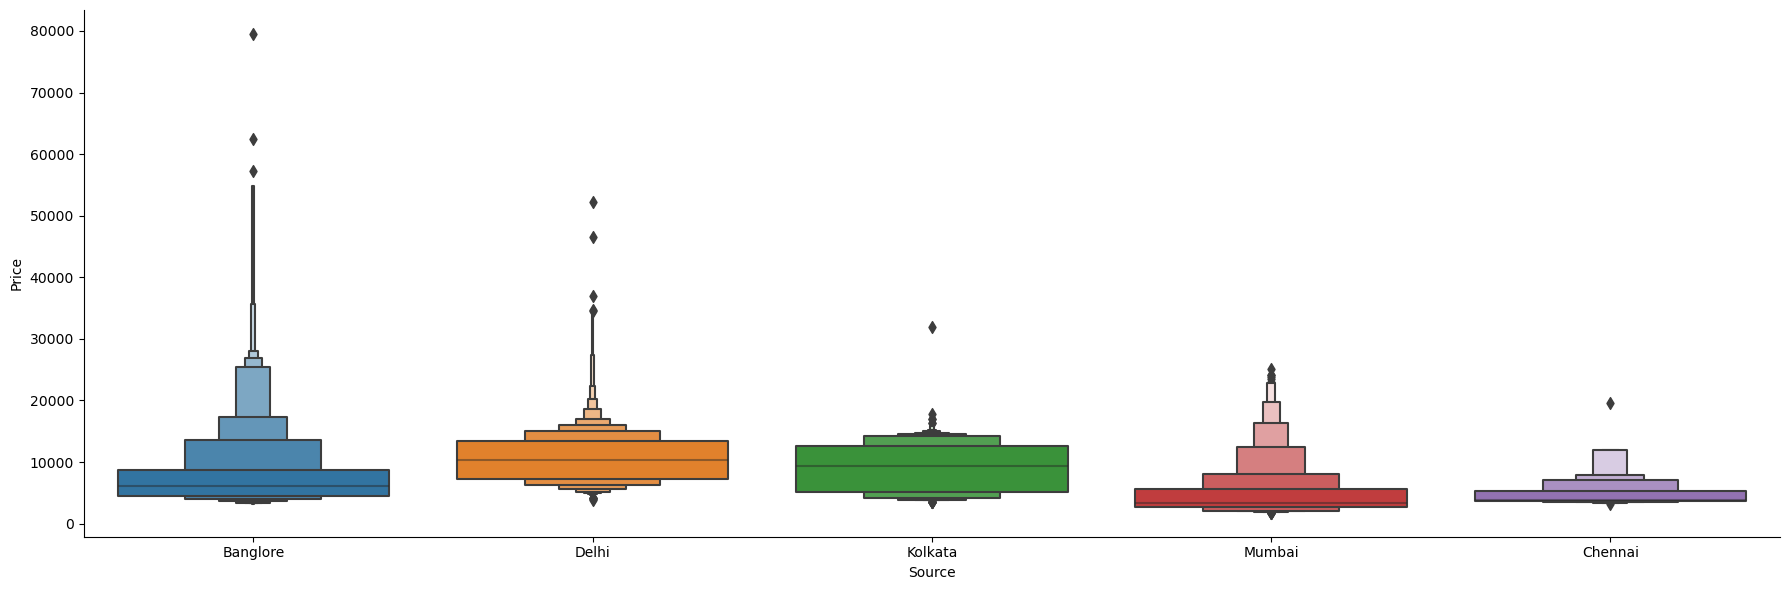

In [63]:
sns.catplot(x='Source',y='Price',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

# Label Encoding:

## 1.One Hot Encoding:
- As Source is Nominal Categorical Data we will do One Hot Encoding :

In [64]:
Source = df_train[['Source']]
Source = pd.get_dummies(Source, drop_first=True).astype(int)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


# Plotting Catplot (Destination Vs Price):

In [65]:
df_train['Destination'].value_counts()

Destination
Cochin       4535
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: count, dtype: int64

/Users/pratikchetry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


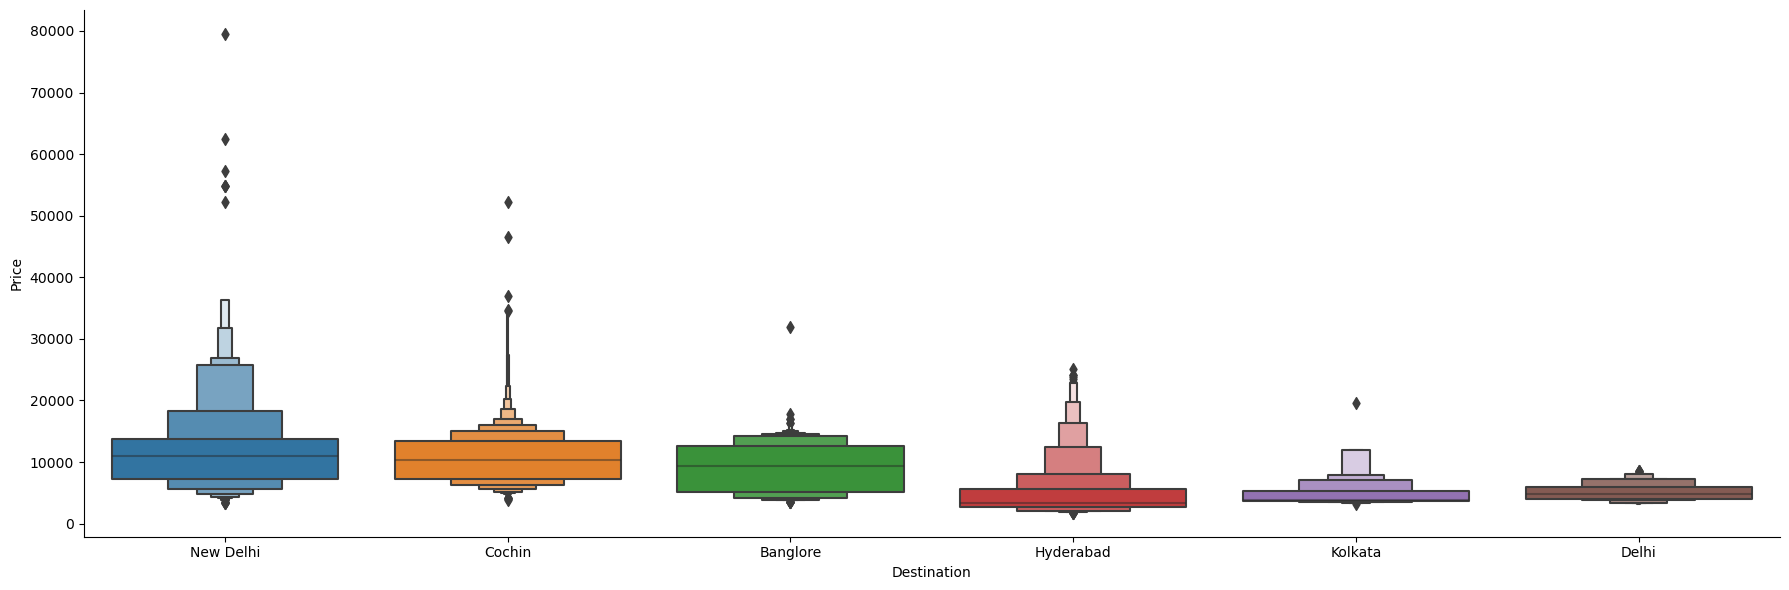

In [66]:
sns.catplot(x='Destination',y='Price',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

# Label Encoding:

## 1.One Hot Encoding:
- As Destination is Nominal Categorical Data we will do One Hot Encoding :

In [67]:
Destination = df_train[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True).astype(int)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [68]:
df_train['Additional_Info'].value_counts()

Additional_Info
No info                         8342
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

# Observation:
- Since Additional_Info column does not have 80% of information we are going to drop this column

In [69]:
df_train.drop('Additional_Info',axis=1,inplace=True)

In [70]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_min
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,2019,21,35,16,50,4,45


In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10680 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Airline        10680 non-null  object 
 1   Source         10680 non-null  object 
 2   Destination    10680 non-null  object 
 3   Total_Stops    10680 non-null  float64
 4   Price          10680 non-null  int64  
 5   Date           10680 non-null  int64  
 6   Month          10680 non-null  int64  
 7   Year           10680 non-null  int64  
 8   Arrival_Hour   10680 non-null  int64  
 9   Arrival_Min    10680 non-null  int64  
 10  Dep_Hour       10680 non-null  int64  
 11  Dep_Min        10680 non-null  int64  
 12  Duration_Hour  10680 non-null  int64  
 13  Duration_min   10680 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 1.2+ MB


In [72]:
## As Total_Stops and Price column are float we are going to change it into a integer.
df_train['Total_Stops']=df_train['Total_Stops'].astype(int)

In [73]:
df_train['Price']=df_train['Price'].astype(int)

In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10680 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10680 non-null  object
 1   Source         10680 non-null  object
 2   Destination    10680 non-null  object
 3   Total_Stops    10680 non-null  int64 
 4   Price          10680 non-null  int64 
 5   Date           10680 non-null  int64 
 6   Month          10680 non-null  int64 
 7   Year           10680 non-null  int64 
 8   Arrival_Hour   10680 non-null  int64 
 9   Arrival_Min    10680 non-null  int64 
 10  Dep_Hour       10680 non-null  int64 
 11  Dep_Min        10680 non-null  int64 
 12  Duration_Hour  10680 non-null  int64 
 13  Duration_min   10680 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.2+ MB


# Concatenating Dataframe----> Airline + Source +  Destination + df_Train:

In [75]:
train_data = pd.concat([ df_train, Airline , Source , Destination],axis=1)

In [76]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,1,10,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,13,15,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,4,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,23,30,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,21,35,...,0,0,0,0,0,0,0,0,0,1


# Droping Airline,Source and Destination Column:

In [77]:
train_data.drop(['Airline','Source','Destination'], axis=1 , inplace=True)

In [78]:
train_data.head()

,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,13,15,5,50,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,4,25,9,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,23,30,18,5,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,21,35,16,50,4,...,0,0,0,0,0,0,0,0,0,1


In [79]:
train_data.shape

(10680, 31)

# TEST DATA :

In [80]:
test_data=pd.read_excel('Test_set.xlsx')

In [81]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


# Feature Engineering on Date_of_Journey:

In [83]:
test_data['Date_of_Journey'].str.split('/').str[0]

0        6
1       12
2       21
3       21
4       24
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 2671, dtype: object

# Spliting Date,Month and Year(Date_of_Journey) into individual column:

In [84]:
test_data['Date']=test_data['Date_of_Journey'].apply(lambda x:x.split('/')[0])
test_data['Month']=test_data['Date_of_Journey'].apply(lambda x:x.split('/')[1])
test_data['Year']=test_data['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [85]:
test_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019


# 3.Converting date,month and year(Date_of_Journey) column into integer:

In [86]:
test_data['Date']=test_data['Date'].astype(int)
test_data['Month']=test_data['Month'].astype(int)
test_data['Year']=test_data['Year'].astype(int)

In [87]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
 10  Date             2671 non-null   int64 
 11  Month            2671 non-null   int64 
 12  Year             2671 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 271.4+ KB


# Droping 'Date_of_Journey' column:

In [88]:
test_data.drop('Date_of_Journey',axis=1,inplace=True)

In [89]:
test_data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019


# Feature Engineering on Arrival_Time:

In [90]:
test_data['Arrival_Time']=test_data['Arrival_Time'].apply(lambda x  : x.split(' ')[0])

## 1.Spliting Hour and Minute(Arrival_Time) into individual column :

In [91]:
test_data['Arrival_Hour']=test_data['Arrival_Time'].apply(lambda x  : x.split(':')[0])
test_data['Arrival_Min']=test_data['Arrival_Time'].apply(lambda x  : x.split(':')[1])

In [92]:
test_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1 stop,No info,6,6,2019,04,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019,10,20


## 2.Droping 'Arrival_Time' column:

In [93]:
test_data.drop('Arrival_Time',axis=1,inplace=True)

In [94]:
test_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,6,6,2019,04,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,12,5,2019,10,20


## 3.Converting 'Arrival_Hour' and 'Arrival_Min' into integer:

In [95]:
test_data['Arrival_Min']=test_data['Arrival_Min'].astype(int)
test_data['Arrival_Hour']=test_data['Arrival_Hour'].astype(int)

In [96]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Route            2671 non-null   object
 4   Dep_Time         2671 non-null   object
 5   Duration         2671 non-null   object
 6   Total_Stops      2671 non-null   object
 7   Additional_Info  2671 non-null   object
 8   Date             2671 non-null   int64 
 9   Month            2671 non-null   int64 
 10  Year             2671 non-null   int64 
 11  Arrival_Hour     2671 non-null   int64 
 12  Arrival_Min      2671 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 271.4+ KB


# Feature Engineering on Dep_Time:

## 1.Spliting Hour and Minute(Dep_Time) into individual column :

In [97]:
test_data['Dep_Hour']=test_data['Dep_Time'].apply(lambda x  : x.split(':')[0])
test_data['Dep_Min']=test_data['Dep_Time'].apply(lambda x  : x.split(':')[1])

In [98]:
test_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,6,6,2019,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,12,5,2019,10,20,06,20


## 2.Droping 'Dep_Time' column:

In [99]:
test_data.drop('Dep_Time',axis=1,inplace=True)

In [100]:
test_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,10,20,06,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,0,19,15


# 3.Converting 'Dep_Hour' and 'Dep_Min' into integer:

In [101]:
test_data['Dep_Hour']=test_data['Dep_Hour'].astype(int)
test_data['Dep_Min']=test_data['Dep_Min'].astype(int)

In [102]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Route            2671 non-null   object
 4   Duration         2671 non-null   object
 5   Total_Stops      2671 non-null   object
 6   Additional_Info  2671 non-null   object
 7   Date             2671 non-null   int64 
 8   Month            2671 non-null   int64 
 9   Year             2671 non-null   int64 
 10  Arrival_Hour     2671 non-null   int64 
 11  Arrival_Min      2671 non-null   int64 
 12  Dep_Hour         2671 non-null   int64 
 13  Dep_Min          2671 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 292.3+ KB


# Maping of Total_Stops column:

In [103]:
test_data['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [104]:
test_data['Total_Stops']=test_data['Total_Stops'].map({'non-stop':0,'2 stops':2, '1 stop':1, '3 stops':3, 'nan':5
                                                     , '4 stops':4})

In [105]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,No info,6,6,2019,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,No info,12,5,2019,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,In-flight meal not included,21,5,2019,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1,No info,21,5,2019,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,24,6,2019,2,45,23,55


# Droping Route column:

In [106]:
test_data.drop('Route',axis=1,inplace=True)

In [107]:
test_data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,Jet Airways,Delhi,Cochin,10h 55m,1,No info,6,6,2019,4,25,17,30
1,IndiGo,Kolkata,Banglore,4h,1,No info,12,5,2019,10,20,6,20
2,Jet Airways,Delhi,Cochin,23h 45m,1,In-flight meal not included,21,5,2019,19,0,19,15


# Feature Engineering on 'Duration' column:

## 1. Spliting Hour and Minute (Duration) into individual column:

In [108]:
test_data['Duration'].str.split(' ').str[0].str.replace("h","")

0       10
1        4
2       23
3       13
4        2
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration, Length: 2671, dtype: object

# 2.Spliting Hour:

In [109]:
test_data['Duration_Hour']=test_data['Duration'].str.split(' ').str[0].str.replace("h", "")

In [110]:
test_data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
0,Jet Airways,Delhi,Cochin,10h 55m,1,No info,6,6,2019,4,25,17,30,10
1,IndiGo,Kolkata,Banglore,4h,1,No info,12,5,2019,10,20,6,20,4
2,Jet Airways,Delhi,Cochin,23h 45m,1,In-flight meal not included,21,5,2019,19,0,19,15,23


In [111]:
test_data[test_data['Duration_Hour']=='5m']
## Since this two column below has no clearly define duration data/feature so we are going to drop it.

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
2660,Air India,Mumbai,Hyderabad,5m,2,No info,12,3,2019,16,55,16,50,5m


# 3.Droping (2660) data from Duration Column:

In [112]:
test_data.drop(2660,axis=0,inplace=True)

In [113]:
test_data[test_data['Duration_Hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour


# 5.Spliting Minute:

In [114]:
test_data['Duration_min']= test_data['Duration'].str.split('h').str[1].str.replace("m" , "")

In [115]:
test_data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_min
0,Jet Airways,Delhi,Cochin,10h 55m,1,No info,6,6,2019,4,25,17,30,10,55
1,IndiGo,Kolkata,Banglore,4h,1,No info,12,5,2019,10,20,6,20,4,
2,Jet Airways,Delhi,Cochin,23h 45m,1,In-flight meal not included,21,5,2019,19,0,19,15,23,45


In [116]:
test_data['Duration_min'].unique()

array([' 55', '', ' 45', ' 50', ' 20', ' 5', ' 15', ' 40', ' 10', ' 35',
       ' 30', ' 25'], dtype=object)

In [117]:
test_data[test_data['Duration_min']=='']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_min
1,IndiGo,Kolkata,Banglore,4h,1,No info,12,5,2019,10,20,6,20,4,
3,Multiple carriers,Delhi,Cochin,13h,1,No info,21,5,2019,21,0,8,0,13,
29,Multiple carriers,Delhi,Cochin,7h,1,No info,1,6,2019,21,0,14,0,7,
33,Jet Airways,Banglore,Delhi,3h,0,No info,12,6,2019,22,50,19,50,3,
68,IndiGo,Banglore,Delhi,3h,0,No info,12,6,2019,0,15,21,15,3,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,Air India,Delhi,Cochin,3h,0,No info,27,3,2019,17,10,14,10,3,
2598,Jet Airways,Delhi,Cochin,11h,1,No info,9,6,2019,19,0,8,0,11,
2604,Multiple carriers,Delhi,Cochin,10h,1,No info,12,6,2019,19,15,9,15,10,
2607,Multiple carriers,Delhi,Cochin,13h,1,No info,3,3,2019,21,0,8,0,13,


# 4. Droping Duration Column:

In [118]:
test_data.drop('Duration',axis=1,inplace=True)

In [119]:
test_data.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_min
0,Jet Airways,Delhi,Cochin,1,No info,6,6,2019,4,25,17,30,10,55
1,IndiGo,Kolkata,Banglore,1,No info,12,5,2019,10,20,6,20,4,
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,5,2019,19,0,19,15,23,45


# Observation:
- In 'Duration_min' column more than 200 of values are missing which cause difficulty while converting it into integer so we are going to replace ('') this missing value with zero.

In [120]:
test_data['Duration_min']=test_data['Duration_min'].replace('',0)

In [121]:
test_data[test_data['Duration_min']=='']

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_min


# 6.Converting 'Duration_hour' and 'Duration_min' into integer:

In [122]:
test_data['Duration_Hour']=test_data['Duration_Hour'].astype(int)

In [123]:
test_data['Duration_min']=test_data['Duration_min'].astype(int)

In [124]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2670 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2670 non-null   object
 1   Source           2670 non-null   object
 2   Destination      2670 non-null   object
 3   Total_Stops      2670 non-null   int64 
 4   Additional_Info  2670 non-null   object
 5   Date             2670 non-null   int64 
 6   Month            2670 non-null   int64 
 7   Year             2670 non-null   int64 
 8   Arrival_Hour     2670 non-null   int64 
 9   Arrival_Min      2670 non-null   int64 
 10  Dep_Hour         2670 non-null   int64 
 11  Dep_Min          2670 non-null   int64 
 12  Duration_Hour    2670 non-null   int64 
 13  Duration_min     2670 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 312.9+ KB


In [125]:
test_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Date               0
Month              0
Year               0
Arrival_Hour       0
Arrival_Min        0
Dep_Hour           0
Dep_Min            0
Duration_Hour      0
Duration_min       0
dtype: int64

# Label Encoding:

# 1.One Hot Encoding:
- As Airline is Nominal Categorical Data we will do One Hot Encoding :

In [126]:
Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True).astype(int)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [127]:
Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True).astype(int)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [128]:
Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True).astype(int)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


# Observation:
- Since Additional_Info column does not have 80% of information we are going to drop this column.

In [129]:
test_data.drop('Additional_Info',axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_min
0,Jet Airways,Delhi,Cochin,1,6,6,2019,4,25,17,30,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,2019,10,20,6,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,2019,19,0,19,15,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,2019,21,0,8,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,2019,2,45,23,55,2,50


# Concatenating Dataframe----> Airline + Source + Destination + test_data:

In [130]:
df_test = pd.concat([ test_data, Airline , Source , Destination],axis=1)
df_test.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,2019,4,25,17,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,2019,10,20,6,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,2019,19,0,19,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,2019,21,0,8,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,2019,2,45,23,...,0,0,0,0,0,0,1,0,0,0


# Droping Airline,Source and Destination Column:

In [131]:
df_test.drop(['Airline','Source','Destination'], axis=1 , inplace=True)
df_test.head()

,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,4,25,17,30,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,2019,10,20,6,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,2019,19,0,19,15,23,45,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,2019,21,0,8,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2019,2,45,23,55,2,50,...,0,0,0,0,0,0,1,0,0,0


In [132]:
df_test.shape

(2670, 29)

# Feature Selection:
- Finding out the best feature which will contribute and have good relation with target variable.
- Some of the feature selection method:
- 1.heatmap
- 2.feature_importance_
- 3.SelectKBest

In [133]:
train_data.shape

(10680, 31)

In [134]:
train_data.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Min', 'Dep_Hour', 'Dep_Min', 'Duration_Hour', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [135]:
X = train_data.loc[:,['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Arrival_Hour',
       'Arrival_Min', 'Dep_Hour', 'Dep_Min', 'Duration_Hour', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,13,15,5,50,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,4,25,9,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,23,30,18,5,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,21,35,16,50,4,...,0,0,0,0,0,0,0,0,0,1


In [136]:
y = train_data.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# Corelation between independent and dependent feature:

<Axes: >

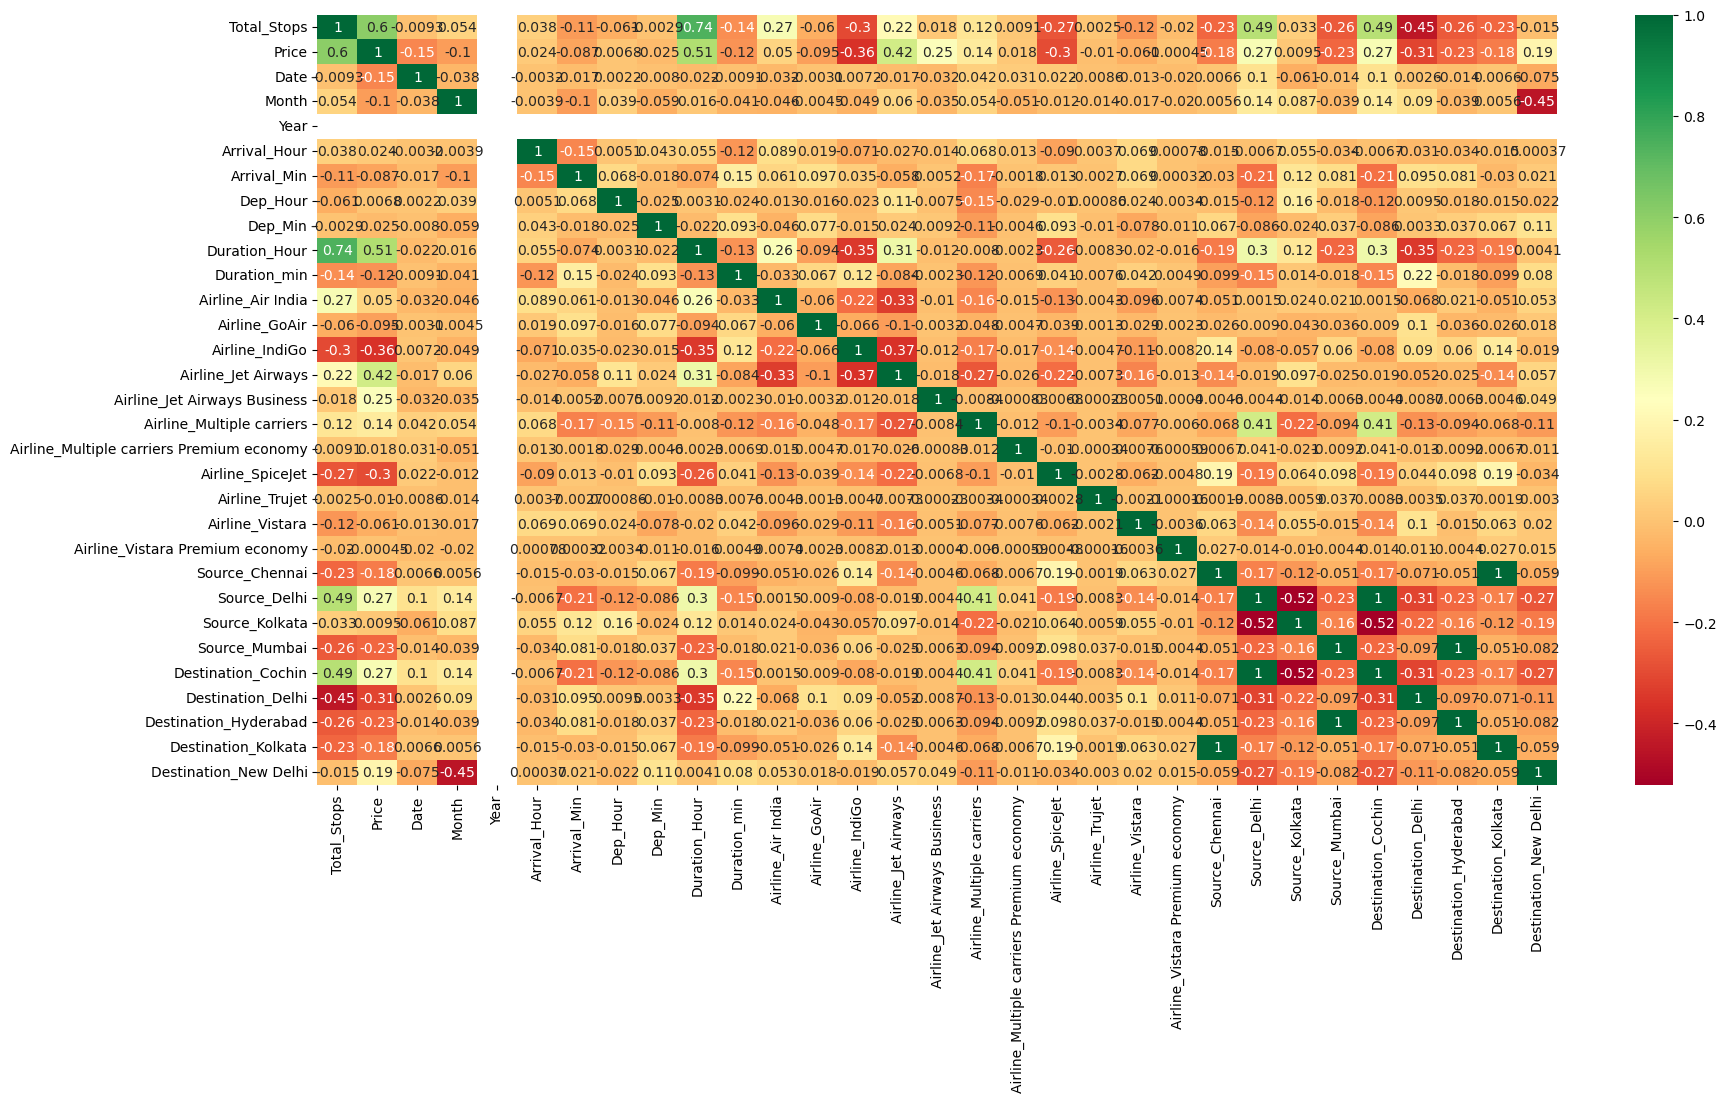

In [137]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")

# Observation:
- Green color basically indicates that it is highly co-related and Red color indicates that it is negatively co-related. 

# Feature Engineering using ExtraTreesRegressor:

In [138]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

# Ploting graph of important feature for better visualisation:

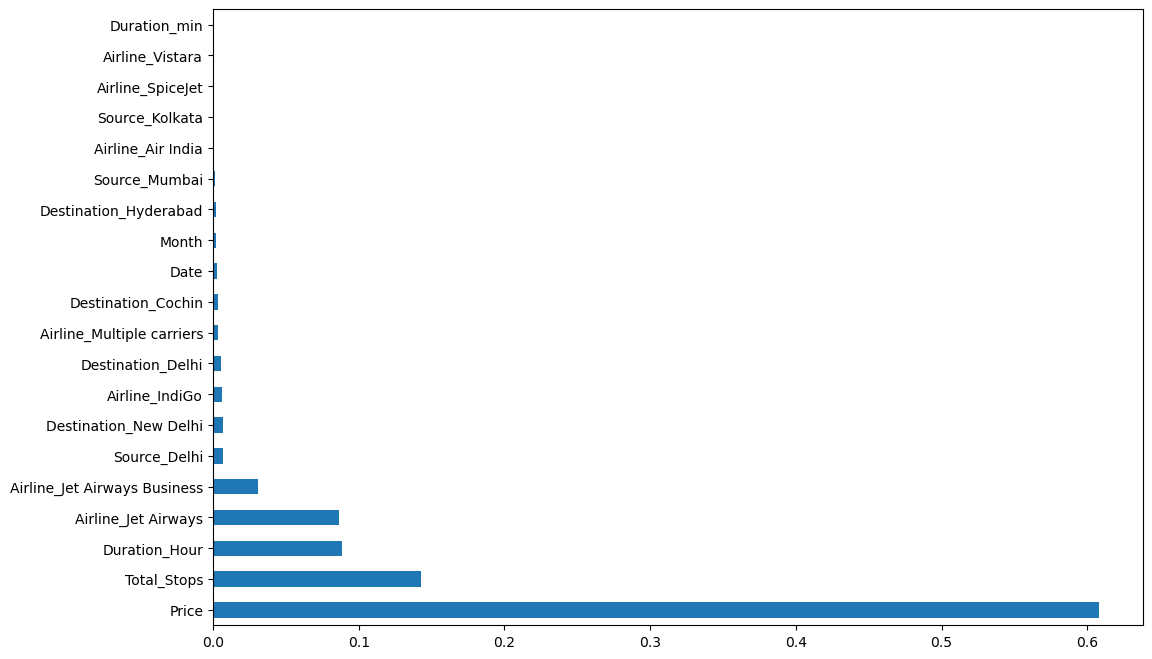

In [139]:
plt.figure(figsize=(12,8))
feat_imp = pd.Series(selection.feature_importances_,index=X.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest:

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.2 , random_state=10)

In [141]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train , y_train)

RandomForestRegressor()

In [142]:
y_pred = reg_rf.predict(X_test)

In [143]:
reg_rf.score(X_train , y_train)

0.999806865414313

In [144]:
reg_rf.score(X_test , y_test)

0.9902399472920805

In [145]:
from sklearn import metrics

In [146]:
print('MAE:' , metrics.mean_absolute_error(y_test,y_pred))
print('MSE:' , metrics.mean_squared_error(y_test,y_pred))
print('RMSE:' , np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 16.619054307116105
MSE: 222147.871241854
RMSE: 4.076647434733117


In [147]:
metrics.r2_score(y_test,y_pred)

0.9902399472920805

# HyperParameter Tuning:

In [148]:
from sklearn.model_selection import RandomizedSearchCV

# Randomized Search CV:

## 1.Number of Trees in Random Forest:

In [149]:
n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 1200 , num = 12)]

## 2.Number of features to consider at every split:

In [150]:
max_features = ['auto' , 'sqrt']

## 3.Maximun number of levels in tree:

In [151]:
max_depth = [int(x) for x in np.linspace(5, 30 , num = 6)]

## 4.Minimum number of samples required to split a node:

In [152]:
min_samples_split = [2, 5, 10, 15, 100]

## 5.Minimum number of samples required at each leaf node:

In [153]:
min_samples_leaf = [1, 2, 5, 10]

# Creating Random Grid:

In [154]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Random search of parameter , using 5 fold cross validation:

In [155]:
rf_random = RandomizedSearchCV(estimator = reg_rf , param_distributions = random_grid ,
                               scoring = 'neg_mean_squared_error', n_iter = 10 , cv = 5 , 
                               verbose = 2 , random_state = 42 , n_jobs =1)

In [156]:
rf_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/Users/pratikchetry/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pratikchetry/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pratikchetry/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/pratikchetry/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [157]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [158]:
prediction = rf_random.predict(X_test)

In [159]:
prediction

array([ 7403.6717625 , 11471.464     , 10934.04038259, ...,
        8096.767     ,  6191.243     , 12445.14692647])

/Users/pratikchetry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

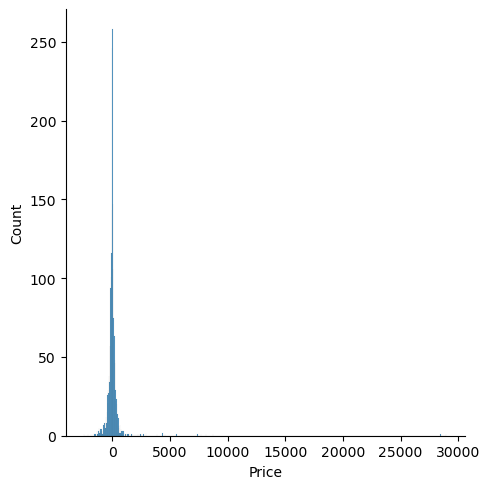

In [160]:
plt.figure(figsize=(12,8))
sns.displot(y_test-prediction)

# Saving the model to reuse it again:

In [161]:
import pickle

In [162]:
file = open('flight_rf.pkl','wb')

In [163]:
file

<_io.BufferedWriter name='flight_rf.pkl'>

In [164]:
pickle.dump(rf_random,file)

In [165]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [166]:
y_prediction = forest.predict(X_test)

In [167]:
metrics.r2_score(y_test,y_prediction)

0.9403172771046353